In [3]:
#过拟合是一种不受欢迎的机器学习行为，当机器学习模型为训练数据提供准确的预测而不是新数据时，就会发生这种行为。 当数据科学家使用机器学习模型进行预测时，他们首先在已知数据集上训练模型。 然后，根据这些信息，该模型尝试预测新数据集的结果。 过度拟合模型可能给出不准确的预测，并且无法对所有类型的新数据表现良好
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### 过拟合是一种不受欢迎的机器学习行为，当机器学习模型为训练数据提供准确的预测而不是新数据时，就会发生这种行为。 当数据科学家使用机器学习模型进行预测时，他们首先在已知数据集上训练模型。 然后，根据这些信息，该模型尝试预测新数据集的结果。 过度拟合模型可能给出不准确的预测，并且无法对所有类型的新数据表现良好

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston=load_boston()

D:\Downloads\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
X=pd.DataFrame(boston['data'])

In [8]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [19]:
X.columns=boston['feature_names']

In [10]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
X.shape

(506, 13)

In [12]:
y=boston.target

In [13]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [14]:
type(y)

numpy.ndarray

## 一个 ndarray 是具有相同类型和大小的项目的（通常是固定大小的）多维容器。 尺寸和数组中的项目的数量是由它的 shape 定义， 它是由N个非负整数组成的 tuple （元组），用于指定每个维度的大小。

# Linear Regression 要点一：为什么没使用14课中的train_test_split及训练集测试集

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score #交叉验证

linregressor=LinearRegression()
cvscore=cross_val_score(linregressor,X,y,cv=5) #cv： 交叉验证折数或可迭代的次数
#https://blog.csdn.net/weixin_42211626/article/details/100064842

## 交叉验证既可以解决数据集的数据量不够大问题，也可以解决参数调优的问题

In [16]:
cvscore

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [17]:
mean_cvscore=np.mean(cvscore)

In [18]:
print(mean_cvscore)

0.3532759243958772


## Ridge Regression 要点二：加入parameters多个备选参数由算法决定最佳调参

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,500,1000]}
ridgeregressor=GridSearchCV(ridge,parameters,cv=5)
ridgeregressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100, 200, 500,
                                   1000]})

#### Grid Search：一种调参手段；穷举搜索：在所有候选的参数选择中，通过循环遍历，尝试每一种可能性，表现最好的参数就是最终的结果

### Ridge regression is a method of estimating the coefficients of multiple- regression models in scenarios where independent variables are highly correlated. It has uses in fields including econometrics, chemistry, and engineering.

In [21]:
print(ridgeregressor.best_params_)
print(ridgeregressor.best_score_)

{'alpha': 200}
0.49798762179623124


## 线性回归，即最小二乘法，它的目的是最小化残差平方的总和。
而岭回归需要在此基础上增加 lambda x 所有参数的平方之和（如斜率等，除y轴截距外），这部分被称为岭回归补偿（Ridge Regression Penalty）。

## Ridge Regression 要点三：算法决定最佳调参后可以再进一步精细化

In [22]:
#在Ridge回归模型中，需要指定一个合适的参数lambda，该参数为施加在回归系数上的惩罚系数，不同的参数lambda可以得到不同的Ridge回归模型。
#ridge=Ridge()
parameters={'alpha':[160,170,180,190,200,210,230]}
ridgeregressor=GridSearchCV(ridge,parameters,cv=5)
ridgeregressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [160, 170, 180, 190, 200, 210, 230]})

In [25]:
print(ridgeregressor.best_params_)
print(ridgeregressor.best_score_)

{'alpha': 180}
0.4982367681072656


# 1. 所有参数绝对值之和，即L1范数，对应的回归方法叫做Lasso回归

2. 所有参数的平方和，即L2范数，对应的回归方法叫做Ridge回归，岭回归

### 正则化是指对模型做显式约束，以避免过拟合。本文用到的lasso回归就是L1正则化。（从数学的观点来看，lasso惩罚了系数向量的L1范数，换句话说，就是系数的绝对值之和。）

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200,300,500]}
lassoregressor=GridSearchCV(lasso,parameters,cv=5)

lassoregressor.fit(X,y)
print(lassoregressor.best_params_)
print(lassoregressor.best_score_)

D:\Downloads\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.431e+03, tolerance: 3.919e+00
  model = cd_fast.enet_coordinate_descent(
D:\Downloads\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.397e+03, tolerance: 3.307e+00
  model = cd_fast.enet_coordinate_descent(
D:\Downloads\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.797e+03, tolerance: 2.814e+00
  model = cd_fast.enet_

{'alpha': 1}
0.431848787926522


In [26]:
Lasso(alpha=1, fit_intercept=False, tol=0.00000000000001,max_iter=10000000000000, positive=True)
#alpha_：交叉验证选择的惩罚量

Lasso(alpha=1, fit_intercept=False, max_iter=10000000000000, positive=True,
      tol=1e-14)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
prediction_lasso=lassoregressor.predict(X_test)
prediction_ridge=ridgeregressor.predict(X_test)

In [29]:
prediction_ridge

array([23.8221835 , 25.20259785, 27.53093947, 14.58951793, 19.6074286 ,
       21.69483525, 21.4566671 , 23.61199647, 20.7368666 , 19.58217475,
        6.63735854, 13.94947909, 18.49317999,  7.72499122, 36.3522899 ,
       31.18961686, 22.33460779, 34.97976822, 30.83078488, 24.46734842,
       25.47472001, 24.6587079 , 20.17171431, 30.01063275, 22.97537586,
       15.45690209, 18.90690169, 21.75900952, 32.56455397, 19.74393167,
       18.12048305, 20.06946532, 20.97263715, 23.81262096, 28.96841294,
       20.7965572 , 10.95091512, 25.35142051, 16.23333426, 13.4982668 ,
       24.98278871, 20.39690622, 21.61521524, 16.39149259, 22.65891092,
       25.1457976 , 18.73402526, 23.8338197 , 12.33037924, 23.8180197 ,
       21.52664928, 17.3346035 , 24.96628962, 27.89463941, 13.76088933,
       21.3597084 , 20.75545937, 15.80907985, 16.20859966, 19.5075779 ,
       19.53138931, 21.89707787, 31.58387677, 31.47599653, 18.42654404,
       31.76658571, 19.22691897, 18.3864344 , 16.63161167, 22.86

In [30]:
prediction_lasso

array([23.74549008, 25.05669894, 27.30699681, 15.26474466, 20.28388223,
       22.75172373, 21.45598059, 24.23856649, 21.11819135, 19.95909495,
        8.98313974, 13.30218316, 17.99925624,  8.39272295, 35.35448484,
       30.78862119, 22.38396018, 34.3159854 , 29.8521009 , 24.63915134,
       25.7851669 , 25.20997813, 20.07312698, 29.34704456, 23.54801802,
       17.49320154, 19.76581421, 22.02254005, 31.35043449, 19.53061141,
       17.86731915, 20.03959005, 22.70589322, 24.27507125, 28.3321545 ,
       20.26286175, 10.68729818, 24.94704305, 15.84336797, 12.8254677 ,
       25.41186454, 20.63647768, 22.05355817, 16.77749717, 23.30629191,
       25.77681736, 19.84379805, 23.32853181, 12.22570134, 23.7054699 ,
       21.09270778, 16.76593695, 24.7895207 , 27.77843148, 15.02615536,
       21.29343807, 21.55732101, 17.59916216, 18.35971801, 19.53427781,
       21.69584327, 22.09466825, 30.77701755, 30.58126341, 18.59617266,
       31.00696923, 18.55257582, 18.71479862, 15.79040727, 22.86

<AxesSubplot:ylabel='Count'>

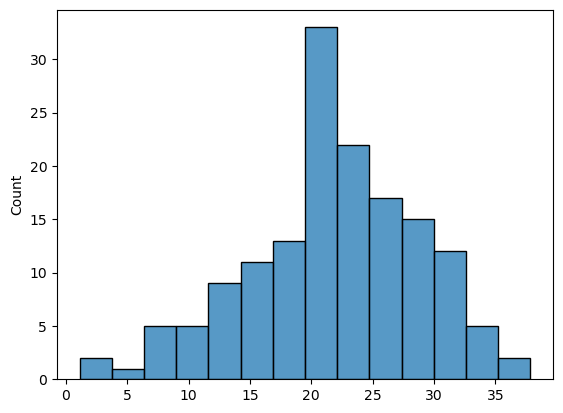

In [31]:
import seaborn as sns

sns.histplot(prediction_lasso)

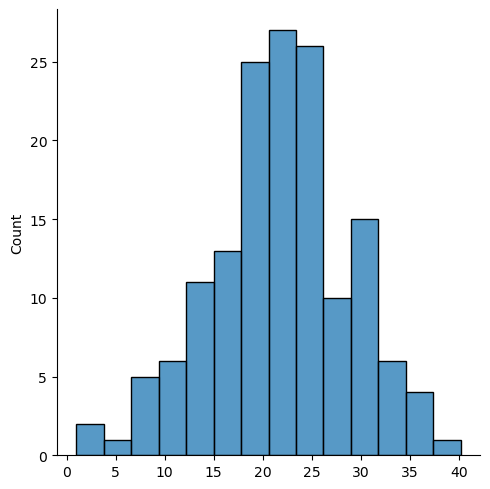

In [32]:
import seaborn as sns

sns.displot(prediction_ridge)